In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
# Loading the dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

# Displaying the first few rows of the dataset
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare             

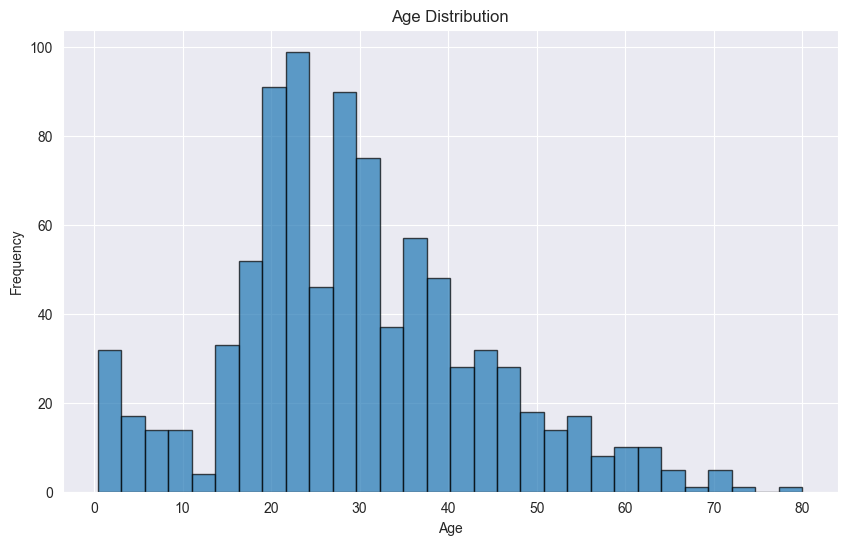

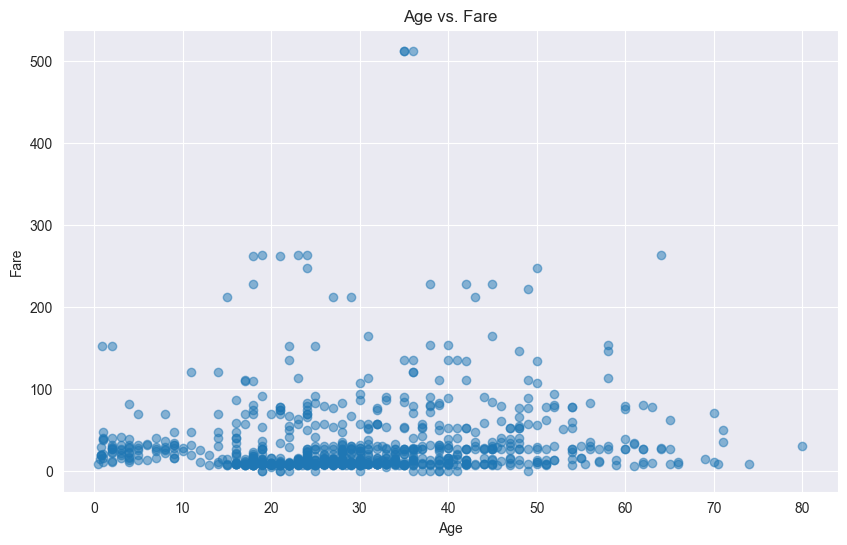

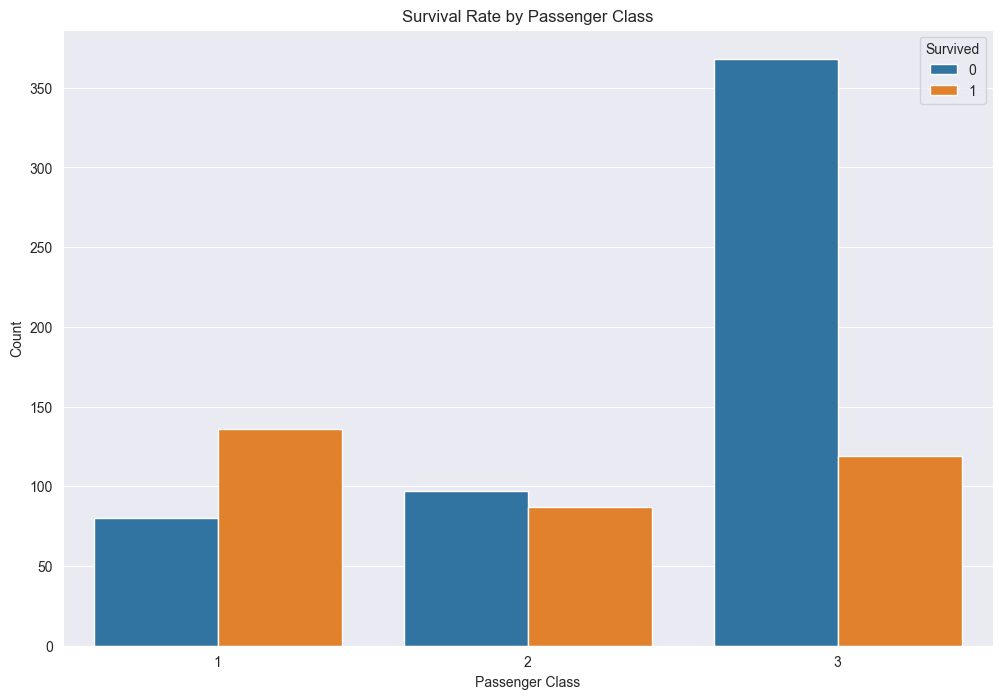

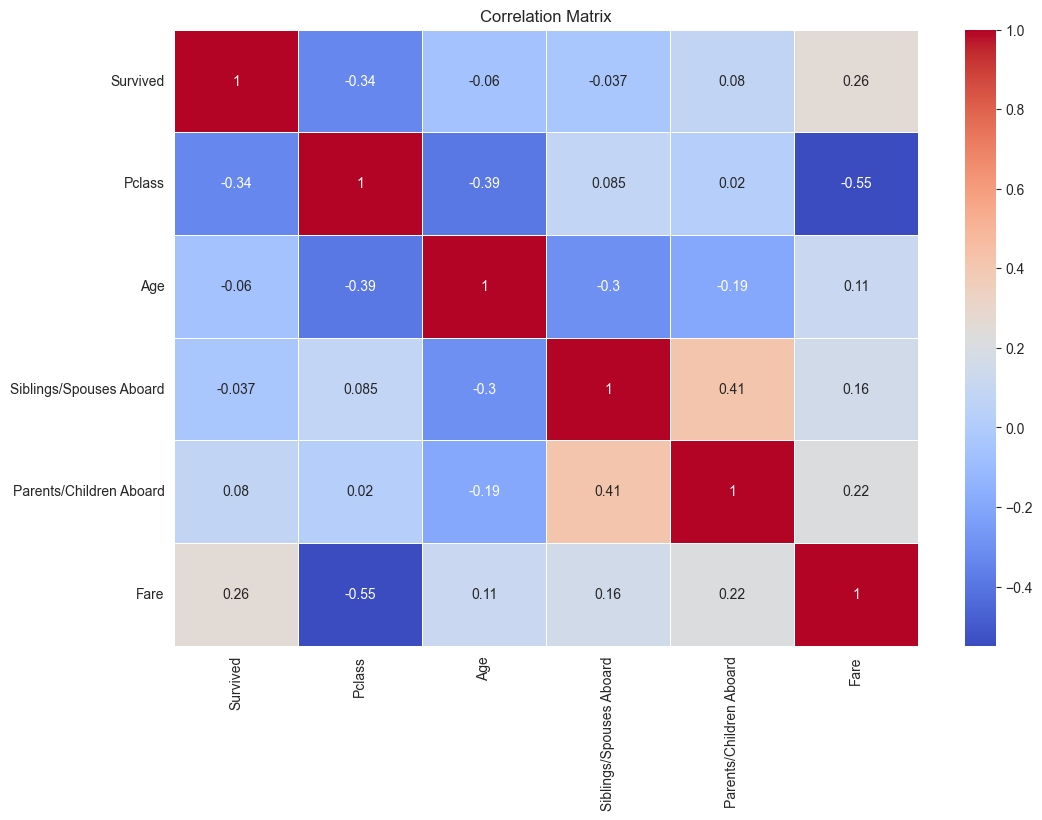

Chi-squared test statistic: 258.3912607678978
p-value: 3.847574039733745e-58


In [11]:
# Verifying the column names
print(data.columns)

# Data Cleaning: Handling missing values
# Check for missing values
print(data.isnull().sum())

# Fill missing Age values with the median age if the 'Age' column exists
if 'Age' in data.columns:
    data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing Embarked values with the most common value if the 'Embarked' column exists
if 'Embarked' in data.columns:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop any remaining rows with missing values
data = data.dropna()

# Data Overview
print(data.info())
print(data.describe())

# Univariate Analysis: Age Distribution
if 'Age' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data['Age'], bins=30, edgecolor='k', alpha=0.7)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Bivariate Analysis: Age vs. Fare
if 'Age' in data.columns and 'Fare' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Age'], data['Fare'], alpha=0.5)
    plt.title('Age vs. Fare')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.show()

# Categorical Analysis: Survival Rate by Passenger Class
if 'Pclass' in data.columns and 'Survived' in data.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=data, x='Pclass', hue='Survived')
    plt.title('Survival Rate by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.show()

# Statistical Analysis: Correlation Matrix
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
if not numeric_columns.empty:
    correlation_matrix = data[numeric_columns].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

# Hypothesis Testing: Survival vs. Sex
# Null hypothesis: There is no significant difference in survival rates between males and females
if 'Sex' in data.columns and 'Survived' in data.columns:
    sex_survival_crosstab = pd.crosstab(data['Sex'], data['Survived'])
    chi2, p, dof, expected = stats.chi2_contingency(sex_survival_crosstab)
    print(f'Chi-squared test statistic: {chi2}')
    print(f'p-value: {p}')

# Saving the clean dataset
data.to_csv('clean_titanic_data.csv', index=False)